In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

/home/arda/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
data = pd.read_csv('data.csv')

In [5]:
data.radius_mean.describe()

count    569.000000
mean      14.127292
std        3.524049
min        6.981000
25%       11.700000
50%       13.370000
75%       15.780000
max       28.110000
Name: radius_mean, dtype: float64

In [13]:
bening = data[data.diagnosis == 'B']
malignant = data[data.diagnosis == 'M']
desc_bening = bening.radius_mean.describe()
Q1 = desc_bening[4]
Q3 = desc_bening[6]
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = bening[(bening.radius_mean < lower_bound) | (bening.radius_mean > upper_bound)]
print("Outliers of radius mean of cells in bening cells = ", list(outliers.radius_mean))

Outliers of radius mean of cells in bening cells =  [6.981, 16.84, 17.85]


In [18]:
melted_data = pd.melt(data, id_vars = 'diagnosis', value_vars = ['radius_mean'])
melted_data

,diagnosis,variable,value
0,M,radius_mean,17.99
1,M,radius_mean,20.57
2,M,radius_mean,19.69
3,M,radius_mean,11.42
4,M,radius_mean,20.29
...,...,...,...
564,M,radius_mean,21.56
565,M,radius_mean,20.13
566,M,radius_mean,16.60
567,M,radius_mean,20.60


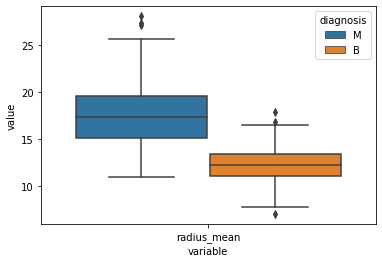

In [17]:
sns.boxplot(x = 'variable', y = 'value', hue = 'diagnosis', data = melted_data)
plt.show()